# Ciclos

En este _notebook_, veremos una nueva forma de control de flujo: los **ciclos**. En general, estos permiten _repetir_ procesos _hasta que_ una condición particular se satisfaga, aunque existen varias formas diferentes de lograr esto.

## Tipos de ciclos

Es muy común que, al programar, necesitemos implementar alguno de los siguientes procesos:
* repetir una serie de instrucciones _mientras_ cierta condición se cumpla (i.e. _hasta que_ se deje de cumplir),
* aplicar una secuencia de instrucciones _sobre_ un arreglo (i.e. _por cada elemento_ del arreglo),
* ejecutar una serie de instrucciones _recursivamente_ (i.e. que la última instrucción sea _volver a ejecutar_ la serie).

En la mayoría de los lenguajes de programación, estas funcionalidades están implementadas a través de **ciclos**. Dado que en los primeros dos procesos se _itera_ sobre una condición o sobre los elementos de un arreglo, respectivamente, se conocen como ciclos **iterativos**, mientras que el tercero se conoce como un ciclo **recursivo**. 

## Ciclos iterativos

### Ciclos `while` (_while loops_)

Los ciclos que ejecutan repetidamente una secuencia de instrucciones _mientras_ cierta condición se cumpla se conocen como ciclos **`while`**. Su sintáxis en Julia es la siguiente:

$\color{green}{\textbf{while }} \text{condition}$

$\quad \quad \text{block}$

$\color{green}{\textbf{end}}$

Al ejecutar este código:
1. Julia reducirá y evaluará la expresión $\text{condition}$.
1. Si $\text{condition}$ se evalúa a `true`, ejecutará el bloque de código $\text{block}$ y regresará al paso 1.
1. Si $\text{condition}$ se evalúa a `false`, **no** ejecutará el bloque de código $\text{block}$ **ni** volverá al paso 1, sino que procederá a ejecutar las instrucciones _posteriores_ al final del ciclo, marcado por $\color{green}{\textbf{end}}$ (de haberlas).

Observa que, para que Julia pueda llegar al paso 3 y terminar de ejecutar el ciclo **`while`**, es necesario que el bloque de código $\text{block}$ **cambie el valor de** $\text{condition}$ en algún punto; ¡de lo contrario, la serie de instrucciones en $\text{block}$ _se ejecutará infinitamente_! Si llegamos a pedirle a la computadora por error que **ejecute un proceso infinito**, deberemos interrumpir nuestro _kernel_ para poder seguir trabajando.

Un ejemplo de un ciclo **`while`** _bien implementado_ (es decir, finito) es el siguiente:

In [9]:
x = 0          #Asignamos el valor 0 a una variable 'x'.

while x <= 2   #Iniciamos un ciclo que se repetirá mientras x
               #tenga un valor menor o igual a 2.
    println(x) #Imprimimos el valor de 'x'.
    x += 1     #¡Aumentamos el valor de 'x' para que el ciclo termine
               #eventualmente y no se haga un proceso infinito!
end

0
1
2


mientras que dos ejemplos de ciclos **`while`** _mal implementados_ (es decir, infinitos) son los siguientes:

In [ ]:
x = 8          #Asignamos el valor 0 a una variable 'x'.

while x <= 2   #Iniciamos un ciclo que se repetirá mientras x
               #tenga un valor menor o igual a 2.
    println(x) #Imprimimos el valor de 'x'.
               #No modificamos el valor de 'x', ¡así que siempre valdrá 0 
end            #y el ciclo se volverá a ejecutar infinitamente!

In [ ]:
x = 0          #Asignamos el valor 0 a una variable 'x'.

while x <= 2   #Iniciamos un ciclo que se repetirá mientras x
               #tenga un valor menor o igual a 2.
    println(x) #Imprimimos el valor de 'x'.
    x -= 1     #Modificamos el valor de 'x', ¡pero NO de forma que
               #eventualmente la condición deje de cumplirse!
end

Una aplicación muy importante de los ciclos **`while`** es la de repetir un cálculo numérico hasta que éste tenga la precisión deseada. Como de costumbre, la precisión se determina como el valor absoluto de la diferencia entre el valor que obtenemos (el resultado del cálculo) y el valor que esperamos (o bien, el valor exacto), por lo que un ejemplo de pseudocódigo que usa un ciclo **`while`** de esta manera para aproximar $\pi$ se podría ver como sigue:

$\varepsilon \ \color{magenta}{\mathbf{=}} \ 0.1 \quad \quad \quad \quad \quad \quad \color{blue}{\text{# Definimos la cota mínima de precisión que queremos.}}$

$\text{p} \ \color{magenta}{\mathbf{=}} \ 3 \ \ \ \quad \quad \quad \quad \quad \quad \color{blue}{\text{# Asignamos un valor a nuestra variable.}}$

$\color{green}{\textbf{while }} \text{abs}(\pi-\text{p}) > \varepsilon \quad \color{blue}{\text{# Mientras la precisión obtenida sea mayor a la deseada...}}$

$\quad \quad \text{block} \ \ \ \quad \quad \quad \quad \color{blue}{\text{# Cálculos que deriven en una reasignación del valor de}}$

$\ \ \ \quad \quad \quad \quad \quad \quad \quad \quad \color{blue}{\text{# la variable p y lo acerquen al valor de } \pi}.$

$\color{green}{\textbf{end}}$

Frecuentemente usaremos los ciclos **`while`** de esta forma cuando veamos [métodos numéricos](../3-Cómputo_científico/3.1-Métodos_numéricos.ipynb).

**Ejercicio** Implementa un código que aproxime la [épsilon de máquina para `Float64`](./1.2-Sistemas_numéricos_de_punto_flotante_y_error_numérico.ipynb#Resumen) **sin utilizar la función `eps`**.

### Ciclos `for` (_for loops_)

Los ciclos que aplican una misma secuencia de instrucciones _por cada elemento de un arreglo_ se conocen como ciclos **`for`**. Su sintáxis en Julia es la siguiente:

$\color{green}{\textbf{for }} \text{iterator } \color{magenta}{\textbf{in }} \text{array}$

$\quad \quad \text{block}$

$\color{green}{\textbf{end}}$

Al ejecutar este código:
1. Julia tomará el primer valor del arreglo $\text{array}$ y se lo asignará a una variable de nombre $\text{iterator}$.
1. Julia ejecutará el bloque de código $\text{block}$, **el cual _puede_ utilizar a la variable** $\text{iterator}$.
1. Julia tomará el _siguiente_ valor de $\text{array}$ y se lo asignará a $\text{iterator}$.
1. Julia repetirá los pasos 2 y 3 hasta que no queden más valores en el arreglo por asignar, en cuyo caso procederá a ejecutar las instrucciones _posteriores_ al final del ciclo, marcado por $\color{green}{\textbf{end}}$ (de haberlas).

Dado que los ciclos **`for`** _iteran_ sobre los elementos de un arreglo, a una variable creada por un ciclo **`for`** se le suele llamar _iterador_.

Las siguientes celdas de código incluyen ejemplos de ciclos **`for`**:

In [7]:
A = [0, 1, 2]

for x in A     #Por cada elemento de A, asignamos su valor a 'x'

    println(x) #e imprimimos el valor asignado a 'x'.
    
end

0
1
2


In [8]:
sum = 0

for n in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    
    sum += 1 / ( n*(n+1) )
    
end

sum

0.9374999999999999

Observa que el primer ejemplo de ciclo **`for`** es totalmente equivalente al primer ciclo **`while`** que vimos en este _notebook_, mientras que el segundo ciclo **`for`** es la suma parcial de los primeros 15 términos de la serie

$$\sum_{n=1}^\infty \frac{1}{(n(n+1))}.$$

En el _notebook_ [`1.2-Sistemas_numéricos_de_punto_flotante_y_error_numérico.ipynb`](./1.2-Sistemas_numéricos_de_punto_flotante_y_error_numérico.ipynb) mencionamos que esta serie es igual a $1$. Observa cómo cambia el valor de `sum` si agregas más valores de la sucesión $1, 2, 3\dots$ al arreglo, o si quitas algunos valores.

Otro ejemplo de uso de un ciclo **`for`** es el siguiente:

In [10]:
prod = 1
A = [0, 'a', "Hola", 0.4, 1000, 7]

for i in A    #Por cada elemento de A,
    
    prod *= 2 #multiplica el valor de `prod` por 2.
    
end

prod

64

Nótese que dentro del ciclo **`for`** anterior _no se usó el valor del iterador_ `i`, por lo que realmente _no importó el contenido del arreglo sobre el que se iteró_ (en este caso, `A`), sino que _sólo importó cuántos elementos tenía el arreglo_. Esto se puede ver cambiando los valores de los elementos de `A` y ejecutando nuevamente la celda. Por ejemplos como éste es que a veces a una variable creada por un ciclo **`for`** también se le llama _contador_.

#### Rangos

Como has observado, es común utilizar ciclos **`for`** sobre conjuntos de números espaciados uniformemente. A estos se les conocen como **rangos**. En Julia, tienen la siguiente sintáxis:

$$\color{green}{\text{a}}\color{magenta}{\textbf{:}}\color{green}{\text{b}}\color{magenta}{\textbf{:}}\color{green}{\text{c}}$$

Al ejecutar este código:
1. Julia creará un rango que tenga al valor $\color{green}{\text{a}}$ como su primer entrada.
2. Julia agregará una nueva entrada al rango sumándole $\color{green}{\text{b}}$ al valor de su última entrada.
3. Julia repetirá el paso 2 hasta que la suma de $\color{green}{\text{b}}$ con el valor de su última entrada "rebase" a $\color{green}{\text{c}}$; el valor que haya cruzado la frontera marcada por $\color{green}{\text{c}}$ **no** será incluido en el rango.

El siguiente ejemplo utiliza un rango como arreglo en un ciclo **`for`** e imprime a los elementos del rango:

In [11]:
for x in 1:0.2:3.0
    
    println(x)
    
end

1.0
1.2
1.4
1.6
1.8
2.0
2.2
2.4
2.6
2.8
3.0


Si escribimos un rango de la forma

$$\color{green}{\text{a}}\color{magenta}{\textbf{:}}\color{green}{\text{c}}$$

Julia asumirá que la diferencia entre los elementos del arreglo es $1$. El siguiente ejemplo usa un rango para calcular la suma parcial de la serie mencionada anteriormente:

In [13]:
sum = 0

for n in 1:10000000
    
    sum += 1 / ( n*(n+1) )
    
end

sum

0.9999998999998153

Observemos que esta forma equivalente de calcular la suma parcial tiene la ventaja de ser más legible y fácil de modificar; para obtener la suma de los primeros $n$ términos ¡sólo debemos cambiar el último valor del rango!

A pesar de que un **rango** _no es lo mismo_ que un arreglo, se puede acceder a sus elementos usando la misma sintáxis, envolviéndolo primero entre paréntesis:

In [14]:
(1:0.2:2)[3] #Accedemos a un elemento de un rango

1.4

Adicionalmente, pueden ser convertidos a un arreglo con la función `collect`:

In [15]:
collect(1:0.5:3) #Convertimos un rango a un vector (arreglo de una dimensión)

5-element Vector{Float64}:
 1.0
 1.5
 2.0
 2.5
 3.0

**Nota** Si recuerdas, en el _notebook_ [`1.3-Tipos_de_datos_de_texto_y_arreglos.ipynb`](./1.3-Tipos_de_datos_de_texto_y_arreglos.ipynb#Índices-y-subarreglos) utilizamos arreglos de índices para acceder a subarreglos de un arreglo, por ejemplo:

In [16]:
[1, 3, 5, 7, 9][[1,3,5]]

3-element Vector{Int64}:
 1
 5
 9

En particular, podemos usar rangos como arreglos de índices para este fin:

In [17]:
[1, 3, 5, 7, 9][1:2:5]

3-element Vector{Int64}:
 1
 5
 9

Por esto es que, cuando sólo ponemos el símbolo `:` sin especificar los parámetros del rango de índices, Julia lo interpreta como _todo el rango de índices posible_. Así es como pudimos, por ejemplo, obtener vectores columna y vectores renglón de una matriz:

In [18]:
[1 2 3 ; 4 5 6 ; 7 8 9][3,:]
#=Devuelve un arreglo con todos los índices posibles de columna
  para el índice 3 de renglón.=#

3-element Vector{Int64}:
 7
 8
 9

In [19]:
[1 2 3 ; 4 5 6 ; 7 8 9][:,2]
#=Devuelve un arreglo con todos los índices posibles de renglón
  para el índice 2 de columna.=#

3-element Vector{Int64}:
 2
 5
 8

#### Creación de arreglos "por comprensión" (_comprehensions_)

En teoría de conjuntos, podemos describir a un conjunto "por extensión"

$$J = \{ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 \}$$

o "por comprensión"

$$J = \{ x \in \mathbb{N} \mid 1 \leq x \leq 10 \},$$

es decir, especificando qué propiedad deben cumplir los elementos del conjunto _en vez de_ enumerarlos a todos.

En Julia, hemos visto que podemos crear arreglos _por extensión_

In [20]:
B = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

pero que también podemos usar rangos para crear arreglos uniformemente espaciados _por comprensión_

In [21]:
C = collect(1:10)

10-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [22]:
B == C #Verificamos que estas dos formas de definir arreglos sean equivalentes.

true

En general, los ciclos **`for`** y los rangos pueden ser utilizados para definir arreglos por comprensión. Por ejemplo,

$$ D = \{1, 4, 9, 16, 25\} = \{ x^2 \mid x\in\mathbb{N}, \ 1\leq x\leq 5 \} $$

puede ser implementado como

In [23]:
D = [ x^2 for x in 1:5 ]

5-element Vector{Int64}:
  1
  4
  9
 16
 25

Incluso podemos añadir declaraciones condicionales dentro de la propiedad que los elementos deben cumplir para pertenecer al arreglo, por ejemplo:

In [24]:
E = [ x^2 for x in -10:10 if (x >= 1 && x <= 5) ]

5-element Vector{Int64}:
  1
  4
  9
 16
 25

In [25]:
D == E #Verificamos que estas dos formas de definir arreglos sean equivalentes.

true

A este tipo de expresiones en Julia se les conoce como _comprehensions_, y su sintáxis general es la siguiente:

$$\text{expression } \color{green}{\textbf{for }} \text{iterator } \color{magenta}{\textbf{in }} \text{range } \color{green}{\textbf{if }} \text{condition}$$

donde $\text{expression}$ es una expresión que define a los elementos del arreglo, $\text{iterator}$ es un iterador que _puede_ aparecer en $\text{expression}$, y la presencia de una declaración condicional $\color{green}{\textbf{if }} \text{condition}$ es opcional.

En particular, podemos utilizar un _comprehension_ donde la variable del ciclo _for_ **no** aparezca en la expresión que define a los elementos del arreglo para definir un arreglo con una cantidad $n$ de entradas con el mismo valor:

In [26]:
[1 for x in 1:10]

10-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

## Ciclos recursivos

La _recursión_ es lo que sucede cuando un proceso hace referencia a sí mismo _como parte del (mismo) proceso_. En este sentido, un **ciclo recursivo** es una serie de instrucciones definida de tal forma que tiene como instrucción ejecutarse a sí misma. Para que un ciclo recursivo _no se repita infinitamente_, antes de que se llame a sí mismo, sus instrucciones deben incluir algo que sea capaz de _cambiar el flujo del ciclo_ para detenerlo.

Recordemos que, en Julia, definimos series de instrucciones como _funciones_ con la siguiente sintáxis (vista en el _notebook_ [`1.4-Variables_constantes_y_funciones.ipynb`](./1.4-Variables_constantes_y_funciones.ipynb#Definición-de-funciones)):

$\color{green}{\textbf{function }} \color{blue}{\text{nombre}} \text{(parámetro1, ... , parámetro$N$}\color{magenta}{\textbf{=}}\text{valorPredeterminado})$

$\quad \quad \text{block}$

$\color{green}{\textbf{end}}$

y controlamos el flujo mediante _condicionales_, como las declaraciones `if`, que tienen la siguiente sintáxis (vista en el _notebook_ [`1.6-Condicionales_y_control_de_flujo.ipynb`](./1.6-Condicionales_y_control_de_flujo.ipynb#Declaraciones-if-(if-statements))):

$\color{green}{\textbf{if }} \text{condition}$

$\quad \quad \text{then...}$

$\color{green}{\textbf{end}}$

Combinando ambas cosas, podemos crear ciclos recursivos, como en el siguiente ejemplo (de la función [factorial](https://es.wikipedia.org/wiki/Factorial)):

In [29]:
function fact(x::Integer)  #Definimos la función factorial `fact`
    
    if x == 0              #Si el argumento es 0,
        
        1                      #devuelve 1;
        
    else                   #en cualquier otro caso,
        
        x*fact(x-1)            #devuelve la multiplicación del argumento por el
                               #factorial del antecesor del argumento.
    end
  
end

fact(3) #Llamamos a la función para probarla.

6

La razón por la que en el ejemplo anterior especificamos que el parámetro de `fact` sea de tipo `Integer` -un tipo de dato abstracto que engloba a los diferentes tipos de dato enteros- es que, si aceptáramos un argumento de tipo flotante, nada nos aseguraría que al restarle $1$ varias veces llegaríamos a obtener $0$, la condición que detiene el ciclo. Sin embargo... ¿qué pasa si llamamos a `fact` con un argumento con tipo de dato entero, pero _negativo_?

**Ejercicio** Crea una función llamada `miFactorial` que tome un argumento de tipo `Integer`, imprima el `String` `"Error: la función miFactorial no se puede ejecutar con valores negativos."` si el argumento es menor a cero, y devuelva el factorial del argumento si es mayor o igual que cero.

In [39]:
function mifactorial(x::Integer)  #Definimos la función factorial `fact`
    
if x<0                         #Primero tenemos que ver si x es menor que 0
         println("Error: la función miFactorial no se puede ejecutar con valores negativos.")
    elseif x == 0              #Si el argumento es 0,
        
        1                      #devuelve 1;
    else                  #en cualquier otro caso,
        
        x*fact(x-1)            #devuelve la multiplicación del argumento por el
                             #factorial del antecesor del argumento
       
    end
  
end

mifactorial(-4) #Llamamos a la función para probarla.

Error: la función miFactorial no se puede ejecutar con valores negativos.


**Nota** La función factorial ya está definida en Julia con el nombre `factorial`, y funciona de forma similar a `miFactorial`, por lo que no tenemos que definir una función factorial cada vez que queramos usarla.

## Visualización de ciclos con... ¡tortugas!

Imaginemos que tenemos una tortuga en el origen de un plano cartesiano que tiene una pluma (de escribir) pegada, la cual puede poner sobre el papel o bien levantar, y que esta tortuga entiende sólo cuatro instrucciones:
* camina hacia adelante un número $d$ de unidades de distancia,
* gira $\theta$ grados,
* levanta la pluma del papel y
* baja la pluma sobre el papel.

Si le pedimos que camine hacia adelante mientras tiene la pluma abajo (i.e. sobre el papel), dibujará una línea recta, mientras que, si le pedimos que camine cuando tiene la pluma arriba (i.e. levantada), no dibujará nada. La tortuga tampoco dibujará nada si le pedimos que gire, pues asumiremos que, aún con la pluma abajo, la marca es tan pequeña que no se alcanza a ver (o que es "de dimensión cero"). 

Observa que, con las cuatro instrucciones anteriores (y la cooperación de la tortuga, por supuesto) **podríamos dibujar cualquier figura bidimensional compuesta únicamente por líneas rectas**. En serio, **piénsalo**.

### Dibujando líneas con tortugas en Julia

Afortunadamente, existe un programa que hace exactamente lo que acabamos de describir. Está incluido dentro del paquete [`ThinkJulia`](https://github.com/BenLauwens/ThinkJulia.jl), creado como recurso didáctico del libro [Think Julia: How to Think Like a Computer Scientist](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#_turtles) de Ben Lauwens. Instalemos e importemos este paquete:

In [2]:
#Importamos el paquete "Pkg" para poder instalar paquetes.
using Pkg                                                  

#Luego, instalamos el paquete "ThinkJulia".
Pkg.add(url="https://github.com/BenLauwens/ThinkJulia.jl")

    Updating git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [3]:
using ThinkJulia # Importamos el paquete "ThinkJulia".

#=NOTA: Después de instalar el paquete "ThinkJulia" localmente en tu computadora,
podrás importarlo las veces que quieras sin tener que volverlo a instalar; por ende,
recomendamos comentar la celda de código anterior después de la instalación inicial,
pues ya no será necesaria más adelante.=#

[ Info: Precompiling ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29]
[ Info: Skipping precompilation since __precompile__(false). Importing ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29].


En la siguiente celda, usamos la función `Turtle` para inicializar nuestra tortuga en el origen del plano cartesiano y luego mostramos un ejemplo con las cuatro instrucciones que podemos darle. Como existe un caracter [`Unicode`](https://es.wikipedia.org/wiki/Unicode) de tortuga que podemos usar para nombrar variables con Julia, lo usaremos para definir a nuestra tortuga, por pura diversión; este caracter se obtiene escribiendo `\:turtle:` en una celda de código de Julia y auto completando con la tecla `TAB`.

Ejecuta la siguiente celda, experimenta cambiando el valor de distancia `d` y comentando alguna o varias líneas del bloque `begin`, y observa cómo cambia el dibujo que haces con la tortuga. ¿Hacia dónde mira la tortuga al inicio? ¿La convención de grados que sigue la tortuga es igual a la convención matemática usual en el plano cartesiano?

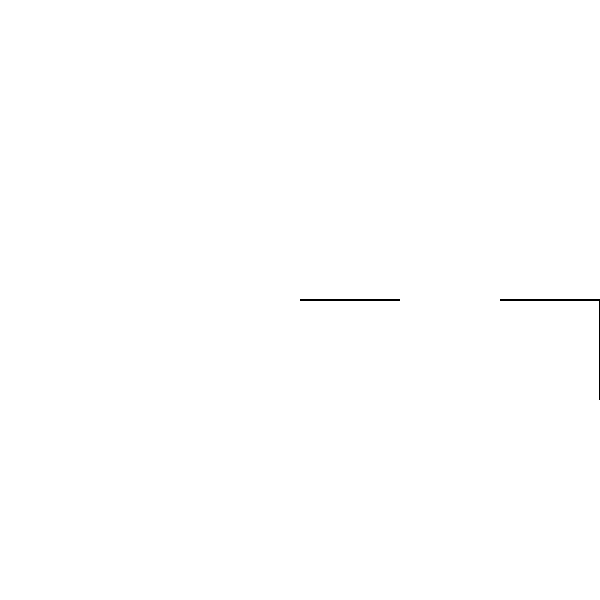

LoadError: syntax: unexpected "end"

In [4]:
🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 100

@svg begin       #Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga.
  forward(🐢,d)
    penup(🐢)
    forward(🐢,d)
    pendown(🐢)
    forward(🐢,d)
    turn(🐢, 90)
    forward(🐢,d)
end

end

#=NOTA: '@svg' toma las instrucciones dentro del bloque 'begin' y genera un "gráfico
vectorizado escalable" (o svg, por sus siglas en inglés) con ellas, que luego Jupyter
nos muestra.=#

**Ejercicio** Dibuja una línea punteada con 5 líneas negras de 10 unidades de distancia cada una con 10 unidades de distancia entre ellas. (Sugerencia: copia el código de la celda anterior y modifícalo a tu conveniencia.)

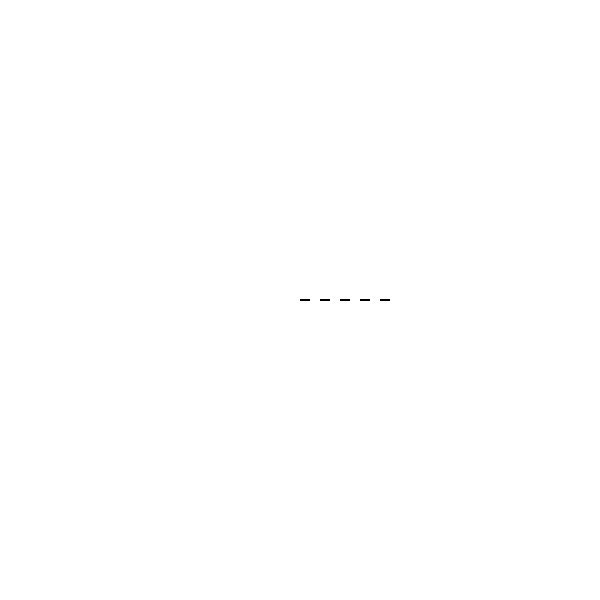

In [5]:
@svg begin       #Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga.
🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.
d = 10               # 10 unidades por cada acción
 for i in 1:5        #Repetimos 5 veces
    forward(🐢,d)    #Movemos 10 unidades 
    penup(🐢)        #Levantamos la pluma
    forward(🐢,d)    #Movemos 10 unidades
    pendown(🐢)      #Bajamos la pluma
end
end


**Ejercicio** Si no utilizaste un ciclo para resolver el ejercicio anterior, reescribe tu programa utilizando un ciclo **`for`** o **`while`**.

In [ ]:
#Sí utilice un ciclo para resolver el ejercicio anterior

**Ejercicio** Haz un programa que tome tres parámetros `n`, `d1` y `d2` (los cuales puedes definir como variables en la misma celda) y dibuje `n` líneas de longitud `d1` con una distancia de separación `d2` entre ellas utilizando un ciclo **`for`** o **`while`**.

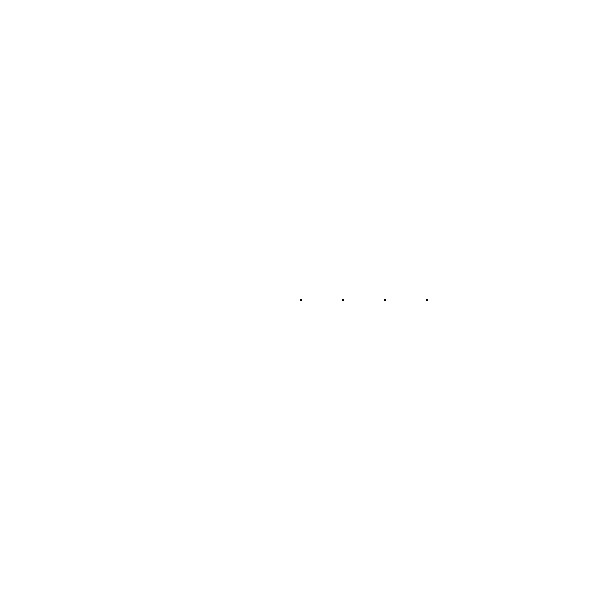

In [73]:
@svg begin       #Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga.
🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.
n=4                #número de líneas
d1= 2               #longitud de la línea
d2=40                #longitud de separación de las líneas
 for i in 1:n        #Repetimos n veces
    forward(🐢,d1)    #Movemos d1 unidades 
    penup(🐢)        #Levantamos la pluma
    forward(🐢,d2)    #Movemos d2 unidades
    pendown(🐢)      #Bajamos la pluma
end
end

**Ejercicio** Haz un programa que dibuje un triángulo equilátero de lado `d`.

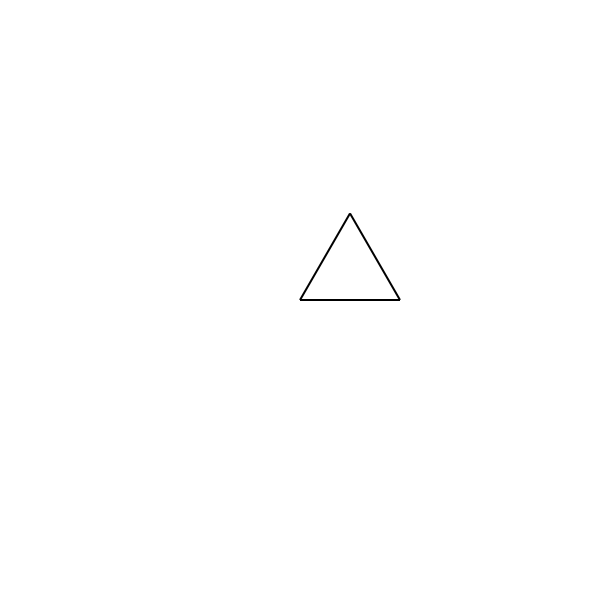

In [109]:
@svg begin
🐢= Turtle()
n=3
d=100
for i in 1:n                 #Nos movemos tres veces porque es un triángulo
    forward(🐢,d)            #Avanzamos d unidades
    turn(🐢, -120)           #Giramos -120 grados 
                            #Lo dividí entre -120 porque 180/3=60 pero como nos estamos moviendo a la derecha necesitamos ir hacia 120 grados, para que el triangulo no salga invertido nos movemos a -120 grados 
    
end
end



**Ejercicio** Generaliza el programa anterior a uno que tome dos parámetros `n` y `d` y dibuje un polígono regular de `n` lados de longitud `d` utilizando un ciclo **`for`** o **`while`**.

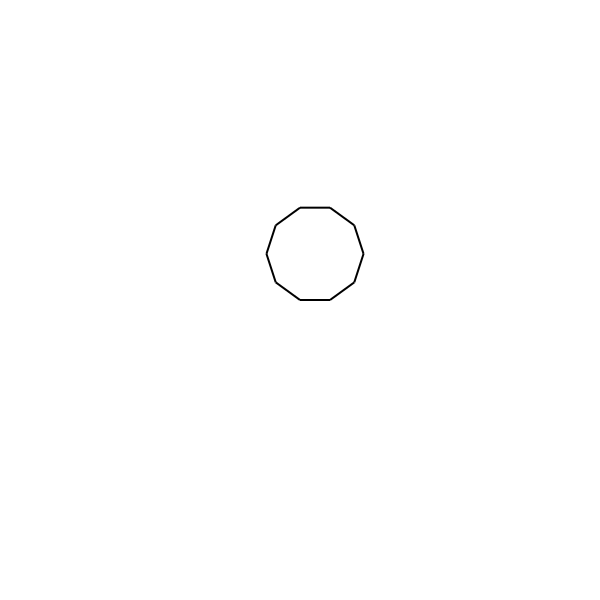

In [183]:
function polígono(🐢,d,n)
@svg begin
🐢= Turtle()         
n=10
d=30 
for i in 1:n                          #Nos movemos n veces, el número de lados del polígono
    forward(🐢,d)                      #Avanzamos d unidades              
    turn(🐢, ((-180/n)*(2)))           #Primero tenemos que dividir -180 grados entre el número de lados que tiene nuestro polígono para que sea regular y vaya a la dirección correcta, lo multiplicamos por 2 para que sea conveniente al momento de dibujar
    
end
end
end
polígono(🐢,d,n)

### Tortugas y fractales

Podemos utilizar ciclos recursivos para dibujar fractales (o al menos una linda aproximación de ellos) con ayuda de nuestra amiga tortuga:

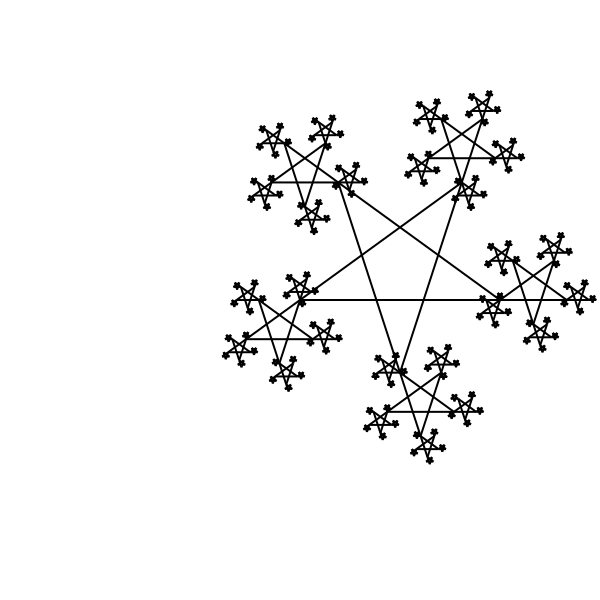

In [52]:
function estrella(tort,dist)      #Sintáxis compacta.
    if dist <= 5
        return
    else
        for i in 1:5
            forward(tort,dist)
            estrella(tort,dist/3)
            turn(tort,216)
        end
    end
end

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 200

@svg estrella(🐢,d) 

**Ejercicio** Crea un fractal **original** con un ciclo recursivo.

Para no tener que escribir todas las figuras que quiero utilizar voy a definir un cuadrado, un triángulo y un pentágono. Estos los haré usando el mismo código que hice para polinómios solo que para cada caso en específico.

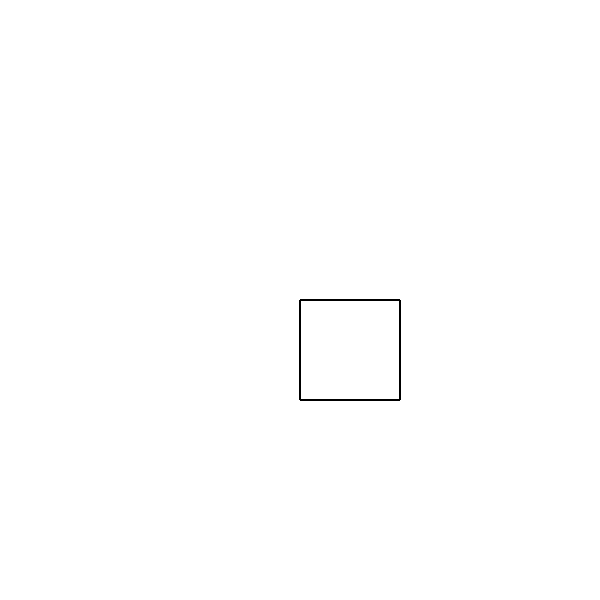

cuadrado (generic function with 2 methods)

In [225]:
@svg begin
🐢= Turtle()         
for i in 1:4
        forward(🐢,100)        #Definire la distancia que se mueve a 100
        turn(🐢,90)            #Como es un cuadrado rota 90 grados 
    end
end
function cuadrado(🐢)          #Defino el cuadrado
    for i in 1:4
        forward(🐢,100)
        turn(🐢,90)
    end
end

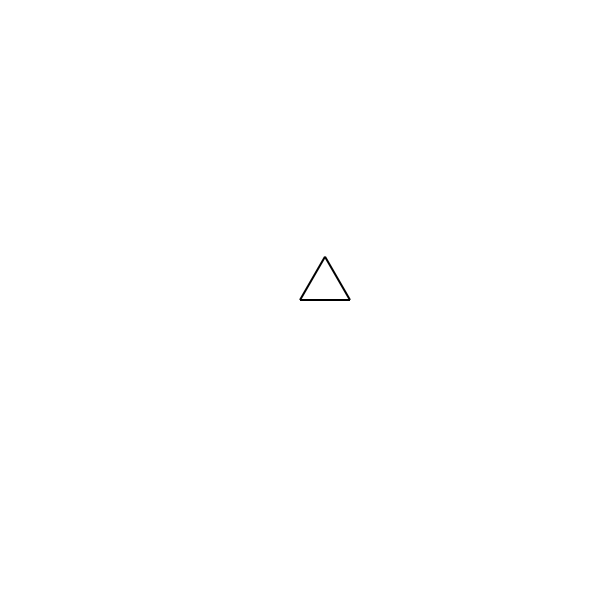

triangulo (generic function with 1 method)

In [235]:
@svg begin
🐢= Turtle()         
for i in 1:3
        forward(🐢,50)         #La distancia de los lados del triangulo es de 50 unidades
        turn(🐢,-120)
    end
end
function triangulo(🐢)         #Defino triangulo
    for i in 1:3
        forward(🐢,100)
        turn(🐢,-120)
    end
end

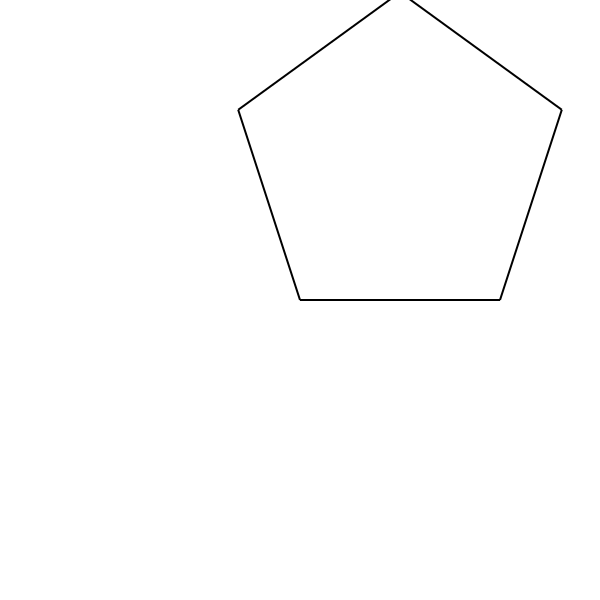

pentágono (generic function with 1 method)

In [237]:
@svg begin
🐢= Turtle()         
for i in 1:5
        forward(🐢,200)            #La distancia de el pentagono es de 200
        turn(🐢,-72)
    end
end
function pentágono(🐢)             #Defino pentágono
    for i in 1:5
        forward(🐢,200)
        turn(🐢,-72)
    end
end

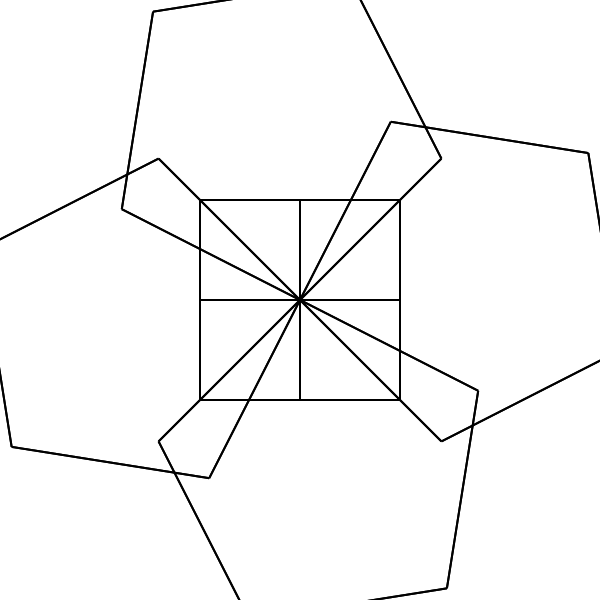

In [254]:
@svg begin
🐢= Turtle()
n=8
    for i in 1:n                  #Para cualquier valor de 1 a n
        cuadrado(🐢)              #hacemos un cuadrado
        turn(🐢,360/n)            #giramos 360 grados entre n para asemejar la figura a un circulo
        if n<8                    #Si n es menor que 8
            triangulo(🐢)         #Hacemos un triángulo
            turn(🐢,360/n)        #Giramos 360 grados entre n
        else                      #En cualquier otro caso, o sea si n es mayor o igual que 8
          pentágono(🐢)           #Hacemos un pentágono 
            turn(🐢,360/n)        #Giramos 360 entre n 
        end
    end
end
#Si hacemos n=1 queda una casita :D

### Dato curioso

El _software_ del paquete `ThinkJulia` que acabamos de utilizar está basado en la biblioteca [`turtle`](https://docs.python.org/3/library/turtle.html) de Python la cual, a su vez, está basada en el lenguaje de programación educativo [`Logo`](https://en.wikipedia.org/wiki/Logo_(programming_language)) creado en 1967.

## Resumen

Los **ciclos** nos permiten _repetir_ procesos _hasta que_ una condición particular se satisfaga. En Julia, existen tres tipos de ciclos:
* **`while`**, que se ejecutan _mientras_ una condición se cumpla (o, equivalentemente, mientras no se deje de cumplir);
* **`for`**, que se ejecutan _por_ cada elemento de un arreglo, y por cada iteración se le asigna el valor del elemento en turno del arreglo a una variable conocida como _iterador_, que puede ser usada dentro del mismo ciclo;
* **recursivos**, que se crean mediante _funciones que se llaman a sí mismas_.

Se pueden crear ciclos _infinitos_ del primer y tercer tipo. Esto puede evitarse en un ciclo **`while`** asegurándose de que las instrucciones dentro del ciclo eventualmente hagan que la condición que determina su ejecución se evalúe a `false`. Para el caso de un ciclo **recursivo**, dentro de la definición de la función recursiva, _antes de que se llame a sí misma_, se debe colocar una declaración condicional de tal forma que uno de los caminos _posibles_ termine el ciclo.

También es posible iterar ciclos **`for`** sobre _rangos_, creados con la sintáxis $\color{green}{\text{a}}\color{magenta}{\textbf{:}}\color{green}{\text{b}}\color{magenta}{\textbf{:}}\color{green}{\text{c}}$, donde $\color{green}{\text{a}}$ es el punto de partida, $\color{green}{\text{b}}$ es la diferencia entre elementos adyacentes y $\color{green}{\text{c}}$ acota a los valores que se pueden incluir en el rango. Los rangos pueden ser convertidos a arreglos con `collect` y, junto con los ciclos **`for`**, sirven para definir arreglos _por comprensión_.


## Recursos complementarios
* Manual de Julia de [ciclos](https://docs.julialang.org/en/v1/manual/control-flow/#man-loops).
* Video [Programming Loops vs Recursion](https://www.youtube.com/watch?v=HXNhEYqFo0o) del canal de YouTube [Computerphile](https://www.youtube.com/@Computerphile).
* Sección "Turtles" del libro digital [Think Julia: How to Think Like a Computer Scientist](https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#_turtles) de Ben Lauwens.